### Testing Model Assumptions Examples 2.11 and 2.12
### Example 2.11: Histogram
The residuals of the **Advertising** data set are plotted as a histogram in the Figure below. A normal density function with mean and variance estimated on the basis of the data is shown in green.

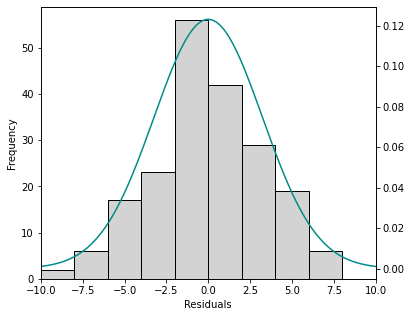

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy.stats import norm

# Load data
df = pd.read_csv('./data/Advertising.csv')
x = df['TV']
y = df['sales']

# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
# Find the predicted values for the original design.
yfit = model.fittedvalues
# Residuals of the model
res = model.resid

# Create Figure and subplots
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

# Plot histogram
res_bins = np.arange(-10, 12, 2)
plt.hist(res, bins=res_bins, 
         facecolor="lightgrey", edgecolor="k" )
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-10, 10)
plt.ylim(bottom=0)

# Plot estimated Normal density function
# new x axis
ax2 = ax1.twinx()
# Estimate mean and standard deviation
mu = np.mean(res)
sigma = np.std(res)
x_pdf = np.arange(-10, 10.1, 0.1)
# Plot Normal density function
ax2.plot(x_pdf, norm.pdf(x_pdf, mu, sigma), 
         '-', color="darkcyan", alpha=1)

# Show plot
plt.show()

It is in general difficult to judge on the basis of a histogram whether the data is normally distributed. In addition, histograms are sensitive with respect to the chosen interval width. 

A *Q-Q plot* or *normal plot* is another graphical tool to verify whether the data is normally distributed. In our context, we plot the quantiles of the empirical residuals versus the theoretical quantiles of a normal distribution.  Instead of the residuals we however use the standardized residuals $\widetilde{r}_i$ in our Q-Q plot. 

### Example 2.12: The Q-Q plot
Figure \ref{fig:ad10} displays the Q-Q plot for the **Advertising** data.

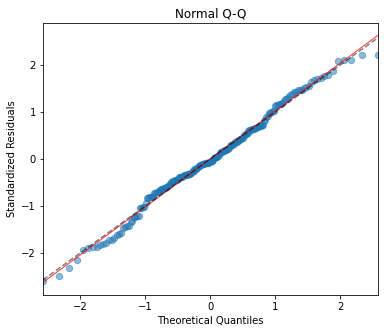

In [6]:
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Influence of the Residuals
res_inf = model.get_influence()
# Studentized residuals using variance from OLS
res_standard = res_inf.resid_studentized_internal

# QQ plot instance
QQ = ProbPlot(res_standard)
# Split the QQ instance in the seperate data
qqx = pd.Series(sorted(QQ.theoretical_quantiles), name="x")
qqy = pd.Series(QQ.sorted_data, name="y")

# Create Figure and subplots
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

sns.regplot(x=qqx, y=qqy, scatter=True, lowess=False, ci=False,
            scatter_kws={'s': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax1.plot(qqx, qqx, '--k', alpha=0.5)

# Set labels
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

plt.show()

If the data actually originates from a normal distribution, then the data points will scatter just slightly around the straight line in the Q-Q plot. 

If we observe a deviation from the straight line in the Q-Q plot, then the question comes up whether such a deviation is  systematic or due to a random variation. In order to answer this question, we run again simulations. In particular, we draw **100**
random samples of length $n$ (number of residuals) from a normal distribution that shares mean and standard deviation with the standardized residuals. The Figure below displays a band of simulated (grey) curves in the case of normally distributed residuals : these  curves may be observed due to random variations. Since the points for the **Advertising** data set lie within this band, we consider the residuals to originate from a normal distribution


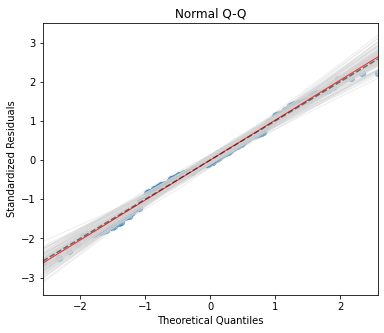

In [10]:
# Split the QQ instance in the seperate data
qqx = pd.Series(sorted(QQ.theoretical_quantiles), name="x")
qqy = pd.Series(QQ.sorted_data, name="y")
# Estimate the mean and standard deviation
mu = np.mean(qqy)
sigma = np.std(qqy)

# Create Figure
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)

n_samp = 100   # Number of resamples
# For ever random resampling
for lp in range(n_samp):
    # Resample indices 
    samp_res_id = np.random.normal(mu, sigma, len(qqx))
    # Plot
    sns.regplot(x=qqx, y=sorted(samp_res_id),
                scatter=False, ci=False, lowess=True, 
                line_kws={'color': 'lightgrey', 'lw': 1, 'alpha': 0.4})

# Add plots for original data and the line x = y
sns.regplot(x=qqx, y=qqy, scatter=True, lowess=False, ci=False,
            scatter_kws={'s': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax1.plot(qqx, qqx, '--k', alpha=0.5)

# Set limits and labels
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

plt.show()